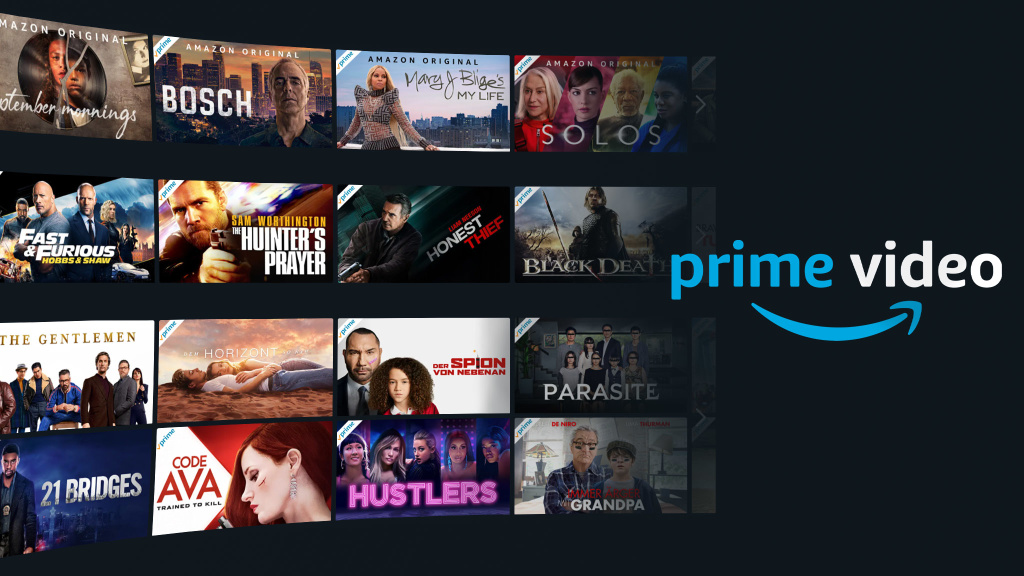

#**Amazon Prime Video Analysis**

**About this Dataset:** <br> Amazon Prime is one of the most popular media and video streaming platforms. They have close to 10000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.

**About this Project:** <br>
Amazon Prime Video is a streaming service offered by Amazon as part of the Amazon Prime subscription package. It allows users to watch a variety of TV shows, movies, and other video on-demand (VOD) content on their device of choice.
Given the large number of movies and series available on the platform, it is a perfect opportunity to flex our data manipulation skills and dive into the entertainment industry. I have been brushing up on my Python skills and has taken a first crack at a CSV file containing Prime Video data. I have performed some analysis on it.
Hope you get a clear idea about the analysis.

### **Importing libraries and data**

In [ ]:
import numpy as np # linear algebra operations
import pandas as pd # used for data preparation
import plotly.express as px #used for data visualization
from textblob import TextBlob #used for sentiment analysis

df = pd.read_csv('amazon_prime_titles.csv')

In [ ]:
df.shape

(9668, 12)

Viewing First 5 rows of Dataset

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### **1. Analyzing Content Ratings**

In [ ]:
df['rating']=df['rating'].fillna('Rating not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,Rating not specified,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,Rating not specified,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,Rating not specified,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,Rating not specified,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

                  rating  counts
0                    13+    2117
1                     16       1
2                    16+    1547
3                    18+    1243
4                     7+     385
5               AGES_16_       2
6               AGES_18_       3
7                    ALL    1268
8               ALL_AGES       1
9                      G      93
10                 NC-17       3
11              NOT_RATE       3
12                    NR     223
13                    PG     253
14                 PG-13     393
15                     R    1010
16  Rating not specified     337
17                 TV-14     208
18                  TV-G      81
19                 TV-MA      77
20                 TV-NR     105
21                 TV-PG     169
22                  TV-Y      74
23                 TV-Y7      39
24               UNRATED      33


In [ ]:
pieChart = px.pie(x, values='counts', names='rating', title='Distribution of content ratings on Amazon Prime Video')
pieChart.show()

### ***Analysis 1: Distribution of Content Ratings***


> Conclusion: The diverse range of content ratings available on Amazon Prime Video indicates that the platform caters to a broad audience with varying preferences and age groups. This understanding can guide content acquisition and recommendation algorithms to better serve the diverse needs of viewers.

### **2. Analyzing Directors**

In [ ]:
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,Rating not specified,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,Rating not specified,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,Rating not specified,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,Rating not specified,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
directors_list = df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0              Don McKellar
1     0              Girish Joshi
2     0               Josh Webber
3     0            Sonia Anderson
4     0              Giles Foster
                    ...          
9663  0           Joseph H. Lewis
9664  0    Director not specified
9665  0              Steve Barker
9666  0    Director not specified
9667  0             Daniel Barber
Length: 10317, dtype: object


In [ ]:
directors_list = directors_list.to_frame()
print(directors_list)

                             0
0    0            Don McKellar
1    0            Girish Joshi
2    0             Josh Webber
3    0          Sonia Anderson
4    0            Giles Foster
...                        ...
9663 0         Joseph H. Lewis
9664 0  Director not specified
9665 0            Steve Barker
9666 0  Director not specified
9667 0           Daniel Barber

[10317 rows x 1 columns]


In [ ]:
directors_list.columns = ['Director']
print(directors_list)

                      Director
0    0            Don McKellar
1    0            Girish Joshi
2    0             Josh Webber
3    0          Sonia Anderson
4    0            Giles Foster
...                        ...
9663 0         Joseph H. Lewis
9664 0  Director not specified
9665 0            Steve Barker
9666 0  Director not specified
9667 0           Daniel Barber

[10317 rows x 1 columns]


In [ ]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                 Director  Total Count
0            Avinash Arun            1
1              Ethan Coen            1
2                    Inc.            6
3          Jeremy Robbins            1
4                      Jr            2
...                   ...          ...
6271       Ángel González            1
6272     Émile Gaudreault            1
6273    Étienne Chatiliez            1
6274  Óskar Thór Axelsson            1
6275                 藤村明世            1

[6276 rows x 2 columns]


In [ ]:
directors = directors[directors.Director != 'Director not specified']

In [ ]:
print(directors)

                 Director  Total Count
0            Avinash Arun            1
1              Ethan Coen            1
2                    Inc.            6
3          Jeremy Robbins            1
4                      Jr            2
...                   ...          ...
6271       Ángel González            1
6272     Émile Gaudreault            1
6273    Étienne Chatiliez            1
6274  Óskar Thór Axelsson            1
6275                 藤村明世            1

[6275 rows x 2 columns]


In [ ]:
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

                   Director  Total Count
3928            Mark Knight          113
1370          Cannis Holder           61
4302  Moonbug Entertainment           37
2879            Jay Chapman           34
1037     Arthur van Merwijk           30
...                     ...          ...
2203     Esteban Diaz Baena            1
2202         Espen Sandberg            1
2201    Esham & Haseen Khan            1
2200            Ersin Celik            1
6275                   藤村明世            1

[6275 rows x 2 columns]


In [ ]:
top5Directors = directors.head()
print(top5Directors)

                   Director  Total Count
3928            Mark Knight          113
1370          Cannis Holder           61
4302  Moonbug Entertainment           37
2879            Jay Chapman           34
1037     Arthur van Merwijk           30


In [ ]:
top5Directors = top5Directors.sort_values(by=['Total Count'])
barChart = px.bar(top5Directors, x = 'Total Count', y = 'Director', title = 'Top 5 Directors on Prime Video')
barChart.show()

### ***Analysis 2: Top 5 Directors***

> Conclusion: By examining the top directors and their contributions to Prime Video content, we can identify key creators who have made significant contributions to the platform's library. This insight could inform content acquisition and production strategies, allowing Prime Video to collaborate with successful directors to enhance its content offerings.



### **Analyzing actors**

In [ ]:
df['cast']=df['cast'].fillna('No cast specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',', expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count')
actors = actors[actors.Actor != 'No cast specified']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Prime Video')
barChart2.show()

### ***Analysis 3: Top 5 Actors***

> Conclusion: The identification of top actors featured in Prime Video content highlights the popularity and appeal of certain performers on the platform. Leveraging the star power of these actors can help attract viewers and increase engagement with Prime Video content.



### **4. Analyzing the content produced on Prime Video based on Years**

---



In [ ]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [ ]:
print(df2)

     Release Year     Type  Total Count
0            1920    Movie            3
1            1922    Movie            2
2            1923    Movie            1
3            1924    Movie            1
4            1925    Movie            8
..            ...      ...          ...
154          2019  TV Show          199
155          2020    Movie          736
156          2020  TV Show          226
157          2021    Movie         1139
158          2021  TV Show          303

[159 rows x 3 columns]


In [ ]:
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Prime Video Every Year")
graph.show()

In [ ]:
df2 = df2[df2['Release Year']>=2000 ]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Prime Video after Year 2000")
graph.show()

### ***Analysis 4: Trend of Content Produced Every Year***



> Conclusion: The trend analysis of content produced on Prime Video over the years provides valuable insights into the platform's growth and evolution. Understanding these trends can inform future content acquisition and production decisions, ensuring that Prime Video remains relevant and competitive in the streaming market.

### **5. Analysing Prime Video Content Genres separately**

*   Movies
*   TV Shows



Movies

In [ ]:
movies_df = df[df['type'] == 'Movie']
movies_genre = movies_df['listed_in'].value_counts().reset_index()
movies_genre.columns = ['Genre', 'Movie Count']
movies_genre = movies_genre.sort_values(by='Movie Count', ascending=False)
print(movies_genre)

                                          Genre  Movie Count
0                                         Drama          870
1                                        Comedy          442
2                               Drama, Suspense          349
3                                 Comedy, Drama          338
4                                   Documentary          300
..                                          ...          ...
328                             Horror, Western            1
329                      Drama, Fantasy, Sports            1
330                            Arthouse, Horror            1
331  Arthouse, Arts, Entertainment, and Culture            1
436                        Anime, Comedy, Drama            1

[437 rows x 2 columns]


In [ ]:
top10MovieGenre = movies_genre.head(10)
print(top10MovieGenre)

                                               Genre  Movie Count
0                                              Drama          870
1                                             Comedy          442
2                                    Drama, Suspense          349
3                                      Comedy, Drama          338
4                                        Documentary          300
5                                      Action, Drama          277
6                                             Horror          253
7                                               Kids          226
8                                             Action          216
9  Arts, Entertainment, and Culture, Comedy, Spec...          215


**Visualizing the Top 10 Movie Genres using Bar Chart**




In [ ]:
graph = px.bar(top10MovieGenre, x='Movie Count', y='Genre', title='Top 10 Movie Genres on Prime Video', labels={'Movie Count': 'Number of Movies', 'Genre': 'Genres'})
graph.show()

TV Shows

In [ ]:
tv_shows_df = df[df['type'] == 'TV Show']
tv_shows_genre = tv_shows_df['listed_in'].value_counts().reset_index()
tv_shows_genre.columns = ['Genre', 'TV Show Count']
tv_shows_genre = tv_shows_genre.sort_values(by='TV Show Count', ascending=False)
print(tv_shows_genre)

                             Genre  TV Show Count
0                         TV Shows            263
1                  Animation, Kids            176
2                            Drama            116
3    Documentary, Special Interest            114
4                             Kids            108
..                             ...            ...
159  Drama, Faith and Spirituality              1
158          Action, Anime, Comedy              1
157           Drama, Kids, Western              1
156     Comedy, Documentary, Drama              1
246                Action, Romance              1

[247 rows x 2 columns]


In [ ]:
top10TVShowsGenre = tv_shows_genre.head(10)
print(top10TVShowsGenre)

                           Genre  TV Show Count
0                       TV Shows            263
1                Animation, Kids            176
2                          Drama            116
3  Documentary, Special Interest            114
4                           Kids            108
5                         Comedy             94
6                    Documentary             50
7                Drama, Suspense             50
8               Special Interest             40
9                  Comedy, Drama             39


Visualizing the Top 10 TV Shows Genre using pie chart

In [ ]:
graph = px.pie(top10TVShowsGenre, values='TV Show Count', names='Genre', title='Top 10 TV Shows Genres on Prime Video', labels={'TV Show Count': 'Number of TV Shows', 'Genre': 'Genres'})
graph.show()

###***Analysis 5: Content Genres***



> Conclusion: Analyzing Prime Video content genres separately reveals the top 10 genres preferred by viewers. This insight can guide content acquisition decisions and marketing strategies to better align with audience preferences, ultimately enhancing viewer satisfaction and engagement.

### **6. Analysing Prime Video contents from different countries**

---



Movies

In [ ]:
country_counts = df.groupby(['country', 'type']).size().reset_index(name='Total Count')
movies_country_counts = country_counts[country_counts['type'] == 'Movie']
tv_shows_country_counts = country_counts[country_counts['type'] == 'TV Show']

In [ ]:
print(movies_country_counts)

                                      country   type  Total Count
0                         Afghanistan, France  Movie            1
1                                   Australia  Movie            4
2         Australia, Colombia, United Kingdom  Movie            1
3           Australia, United States, Germany  Movie            1
4                                     Austria  Movie            1
..                                        ...    ...          ...
89                    United States, Thailand  Movie            1
90        United States, United Arab Emirates  Movie            1
91              United States, United Kingdom  Movie            6
93     United States, United Kingdom, Germany  Movie            1
94  United States, United Kingdom, Kazakhstan  Movie            1

[79 rows x 3 columns]


In [ ]:
movies_country_counts_filtered = movies_country_counts[['country', 'Total Count']]
movies_country_counts_filtered = movies_country_counts.dropna(subset=['country'])
min_count = movies_country_counts_filtered['Total Count'].min()
max_count = movies_country_counts_filtered['Total Count'].max()

In [ ]:
fig = px.choropleth(movies_country_counts_filtered,
                    locations='country',
                    locationmode='country names',
                    color='Total Count',
                    hover_name='country',
                    hover_data={'Total Count': True, 'country': False},
                    title='Movie Counts by Country on Prime Video',
                    color_continuous_scale='Viridis',
                    range_color=(min_count, max_count))

fig.show()

TV Shows

In [ ]:
print(tv_shows_country_counts)

                                  country     type  Total Count
11                  Canada, United States  TV Show            2
13        Chile, Argentina, United States  TV Show            1
15                Czech Republic, Germany  TV Show            1
21                                 France  TV Show            1
26                                Germany  TV Show            2
30                                  India  TV Show           16
39                                  Italy  TV Show            2
42                                  Japan  TV Show            2
47                                 Mexico  TV Show            2
49                            New Zealand  TV Show            1
53                                  Spain  TV Show            5
58                         United Kingdom  TV Show            4
59  United Kingdom, Canada, United States  TV Show            1
66          United Kingdom, United States  TV Show            3
69                          United State

In [ ]:
tv_shows_country_counts_filtered = tv_shows_country_counts[['country', 'Total Count']]
tv_shows_country_counts_filtered = tv_shows_country_counts.dropna(subset=['country'])
min_count = tv_shows_country_counts_filtered['Total Count'].min()
max_count = tv_shows_country_counts_filtered['Total Count'].max()

In [ ]:
fig = px.choropleth(tv_shows_country_counts_filtered,
                    locations='country',
                    locationmode='country names',
                    color='Total Count',
                    hover_name='country',
                    hover_data={'Total Count': True, 'country': False},
                    title='TV Shows Counts by Country on Prime Video',
                    color_continuous_scale='Viridis',
                    range_color=(min_count, max_count))

fig.show()

### ***Analysis 6: Content from Different Countries***

> Conclusion: Examining content from all countries provides a comprehensive view of the global content landscape on Amazon Prime Video. This analysis highlights the platform's diverse content offerings from around the world, catering to the interests and preferences of a global audience. Understanding the distribution of content by country can inform localization efforts and content acquisition strategies to better serve viewers in different regions and enhance their viewing experience.

### **7. Analyzing the Top 10 Countries producing Prime Video contents**

In [ ]:
# Top 10 countries for movies and TV shows
top_movies_countries = movies_country_counts.sort_values(by='Total Count', ascending=False).head(10)['country'].tolist()
top_tv_shows_countries = tv_shows_country_counts.sort_values(by='Total Count', ascending=False).head(10)['country'].tolist()

Movies

In [ ]:
# Function to get the details of the top movie for a given country
def get_top_movie_details(country):
    # Filter movies by country
    movies_by_country = movies_df[movies_df['country'] == country]

    # Get the top rated movie for the country
    top_movie = movies_by_country.sort_values(by='rating', ascending=False).head(1)

    # Get the details of the top movie
    top_movie_title = top_movie['title'].iloc[0]
    top_movie_rating = top_movie['rating'].iloc[0]
    top_movie_genre = top_movie['listed_in'].iloc[0]

    return top_movie_title, top_movie_rating, top_movie_genre

# Display the details of the top movie for each of the top 10 countries for movies
for country in top_movies_countries:
    top_movie_title, top_movie_rating, top_movie_genre = get_top_movie_details(country)
    print(f"Country: {country}, Top Movie: {top_movie_title}, Rating: {top_movie_rating}, Genre: {top_movie_genre}")


Country: India, Top Movie: Sunny, Rating: PG-13, Genre: Drama, Suspense
Country: United States, Top Movie: Secrets of Deception, Rating: Rating not specified, Genre: Action, Drama, Suspense
Country: United Kingdom, Top Movie: Monster Maker, Rating: Rating not specified, Genre: Drama, Fantasy
Country: Canada, Top Movie: The Grand Seduction, Rating: Rating not specified, Genre: Comedy, Drama
Country: United Kingdom, United States, Top Movie: Inconceivable, Rating: R, Genre: Suspense
Country: Italy, Top Movie: Copperman, Rating: 7+, Genre: Action, Drama, Fantasy
Country: United States, United Kingdom, Top Movie: Prometheus (4K UHD), Rating: R, Genre: Science Fiction
Country: Canada, United States, Top Movie: Black Water, Rating: R, Genre: Action, Adventure
Country: India, United States, Top Movie: Maharshi, Rating: 7+, Genre: Action, Drama, International
Country: Australia, Top Movie: The Witch of Kings Cross, Rating: 16+, Genre: Documentary


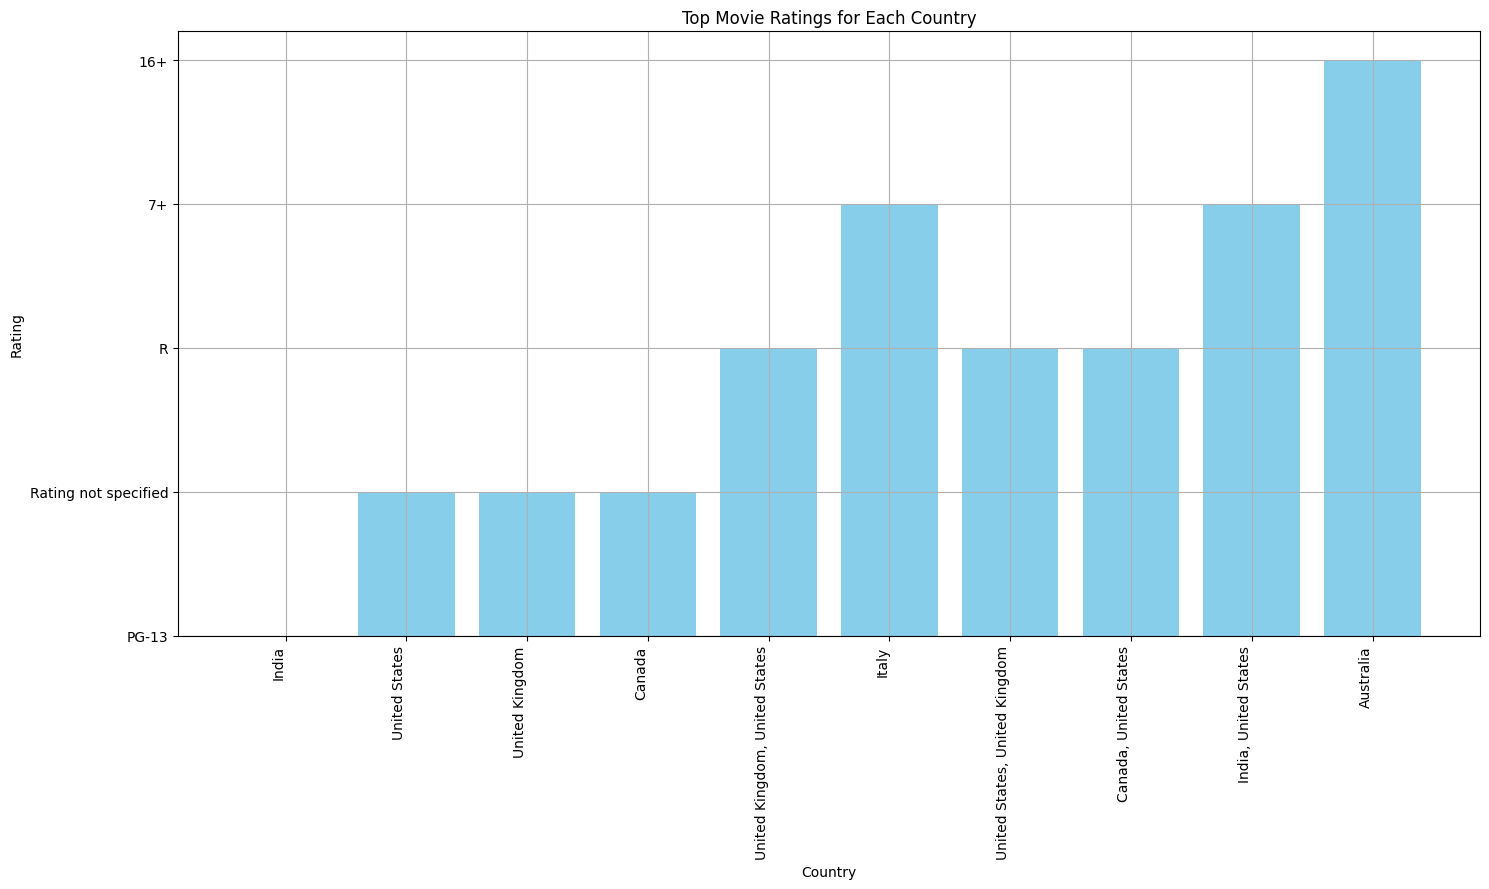

In [ ]:
import matplotlib.pyplot as plt

# Create lists to store movie details
top_movie_titles = []
top_movie_ratings = []
top_movie_genres = []

# Get the details of the top movie for each country
for country in top_movies_countries:
    top_movie_title, top_movie_rating, top_movie_genre = get_top_movie_details(country)
    top_movie_titles.append(top_movie_title)
    top_movie_ratings.append(top_movie_rating)
    top_movie_genres.append(top_movie_genre)

# Plot the top movies for each country
plt.figure(figsize=(15, 9))
plt.bar(top_movies_countries, top_movie_ratings, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.title('Top Movie Ratings for Each Country')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


TV Shows

In [ ]:
# Function to get the details of the top movie for a given country
def get_top_tv_shows_details(country):
    # Filter movies by country
    tv_shows_by_country = tv_shows_df[tv_shows_df['country'] == country]

    # Get the top rated movie for the country
    top_tv_shows = tv_shows_by_country.sort_values(by='rating', ascending=False).head(1)

    # Get the details of the top movie
    top_tv_shows_title = top_tv_shows['title'].iloc[0]
    top_tv_shows_rating = top_tv_shows['rating'].iloc[0]
    top_tv_shows_genre = top_tv_shows['listed_in'].iloc[0]

    return top_tv_shows_title, top_tv_shows_rating, top_tv_shows_genre

# Display the details of the top movie for each of the top 10 countries for movies
for country in top_tv_shows_countries:
    top_tv_shows_title, top_tv_shows_rating, top_tv_shows_genre = get_top_tv_shows_details(country)
    print(f"Country: {country} - Top TV Shows: top_tv_shows_title, Rating: {top_tv_shows_rating}, Genre: {top_tv_shows_genre}")

Country: United States - Top TV Shows: top_tv_shows_title, Rating: TV-MA, Genre: Drama
Country: India - Top TV Shows: top_tv_shows_title, Rating: 18+, Genre: Drama, International
Country: Spain - Top TV Shows: top_tv_shows_title, Rating: TV-MA, Genre: Drama, Suspense
Country: United Kingdom - Top TV Shows: top_tv_shows_title, Rating: 18+, Genre: Comedy
Country: United Kingdom, United States - Top TV Shows: top_tv_shows_title, Rating: 16+, Genre: Comedy
Country: Canada, United States - Top TV Shows: top_tv_shows_title, Rating: ALL, Genre: Kids
Country: Germany - Top TV Shows: top_tv_shows_title, Rating: 18+, Genre: Drama, International
Country: Italy - Top TV Shows: top_tv_shows_title, Rating: TV-G, Genre: Adventure, Comedy, Unscripted
Country: Japan - Top TV Shows: top_tv_shows_title, Rating: 18+, Genre: Fantasy, Horror, International
Country: Mexico - Top TV Shows: top_tv_shows_title, Rating: TV-MA, Genre: Action, Drama


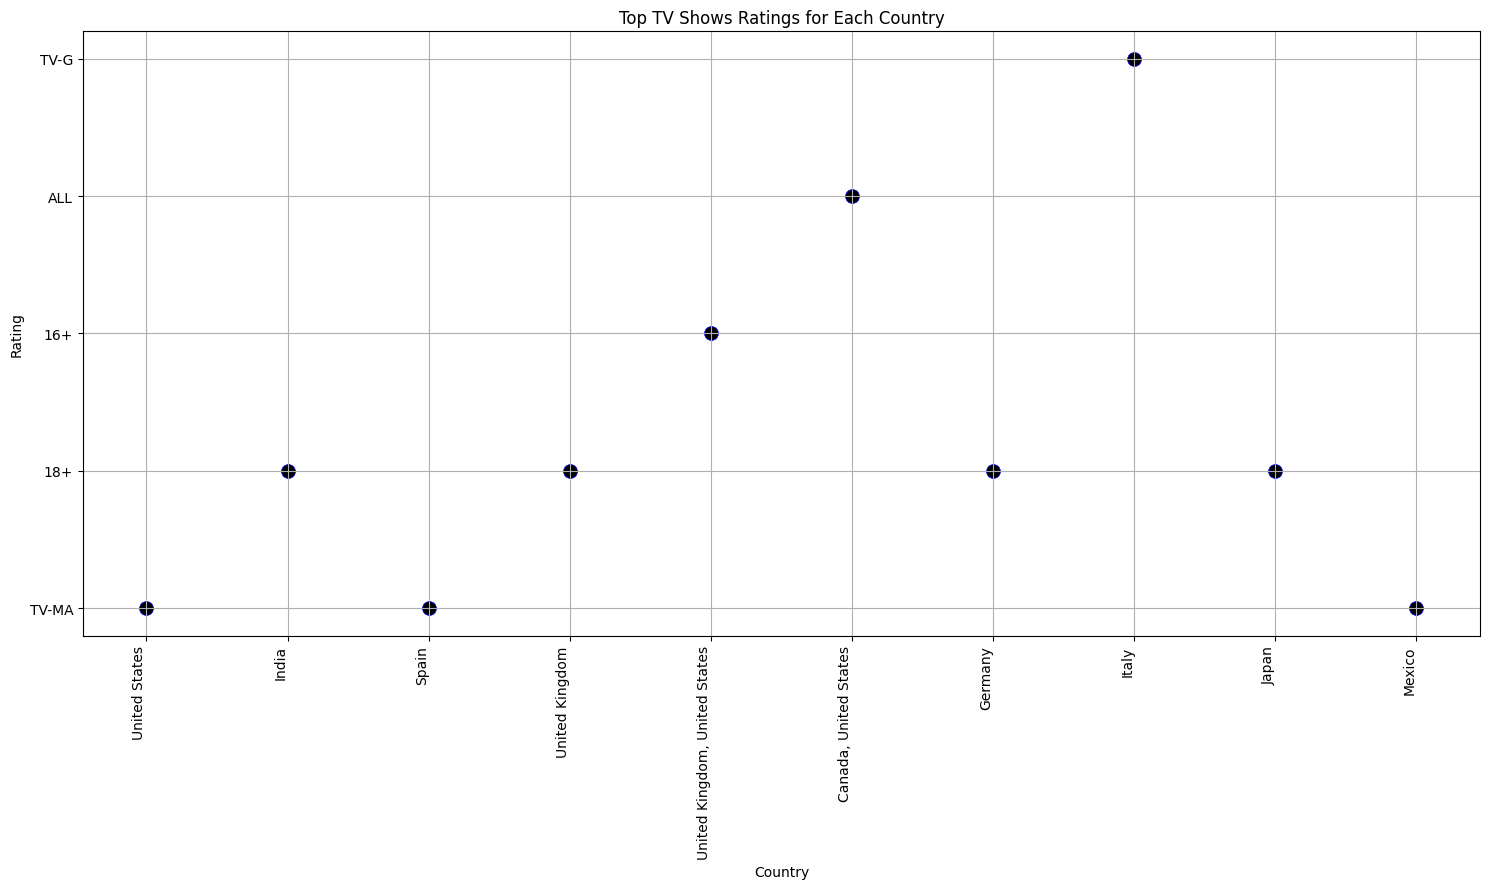

In [ ]:
import matplotlib.pyplot as plt

# Create lists to store movie details
top_tv_shows_titles = []
top_tv_shows_ratings = []
top_tv_shows_genres = []

# Get the details of the top movie for each country
for country in top_tv_shows_countries:
    top_tv_shows_title, top_tv_shows_rating, top_tv_shows_genre = get_top_tv_shows_details(country)
    top_tv_shows_titles.append(top_tv_shows_title)
    top_tv_shows_ratings.append(top_tv_shows_rating)
    top_tv_shows_genres.append(top_tv_shows_genre)

# Plot the top movies for each country
plt.figure(figsize=(15, 9))
plt.scatter(top_tv_shows_countries, top_tv_shows_ratings, color='black', marker='o', s=100, alpha=1.0, edgecolor='blue', linewidth=0.5)
plt.xlabel('Country')
plt.ylabel('Rating')
plt.title('Top TV Shows Ratings for Each Country')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


### ***Analysis 7: Content from Top 10 Countries***

> Conclusion: Focusing on content from the top 10 countries producing content for Amazon Prime Video reveals key contributors to the platform's content library. These countries represent significant sources of content and contribute to the platform's international appeal and diversity. Analyzing content from these countries can inform strategic decisions related to content acquisition, localization, and audience engagement strategies tailored to specific regions.

### **8. Sentiment Analysis of Prime Video content**

In [ ]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year':'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

df3 = df3[df3['Release Year']>1990]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Sentiment Analysis of Content on Prime Video")
barGraph.show()

### ***Analysis 8: Sentiment Analysis***

> Conclusion: The sentiment analysis of Prime Video content provides insights into audience perceptions and reactions. Positive sentiment indicates strong viewer satisfaction, while negative sentiment may highlight areas for improvement. Leveraging sentiment analysis can help optimize content offerings and enhance viewer engagement on the platform.

## Final Result: Over the years, Prime Video has produced more and more content, most of which are more positive than negative. This indicates strong viewer satisfaction.